### Parte 1 do projeto - Cálculo do RMSE

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
obs = xr.open_dataset('observation.nc')['temperatura']
prev = xr.open_dataset('forecast.nc')['t2m']
prev=prev-273.15

In [5]:
obs.coords['lat'] = prev.lat
obs.coords['lon'] = prev.lon

In [6]:
lista_rmse=[]

tempo=pd.date_range(prev.time[0].values, prev.time[-1].values, freq='6H')

for t in tempo:
    

    t1=pd.Timestamp(str(t))
    t2=pd.Timestamp(str(t))
    prev_6h=prev.sel(time=slice(t1,t2))
    obs_6h=obs.sel(time=slice(t1,t2))
    rmse_6h=(((prev_6h - obs_6h)**2).mean(dim='time')**0.5).assign_coords(time=t).expand_dims('time')
    
  
    lista_rmse.append(rmse_6h)

In [7]:
rmse_ds=xr.concat(lista_rmse, dim='time')

rmse_ds.to_netcdf('result_rmse.nc')

In [8]:
result = xr.open_dataset('result_rmse.nc')

### Parte 2 do projeto - Plot de mapas espaciais

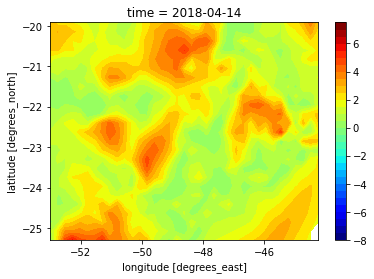

In [9]:
#RMSE para o tempo 1
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-14T00:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

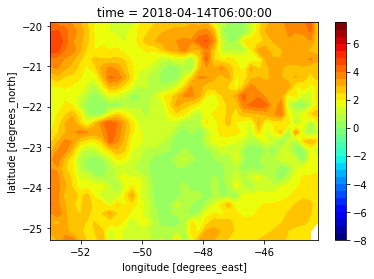

In [10]:
#RMSE para o tempo 2
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-14T06:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

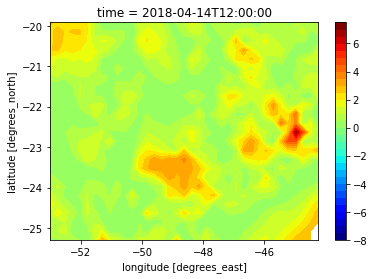

In [11]:
#RMSE para o tempo 3
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-14T12:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

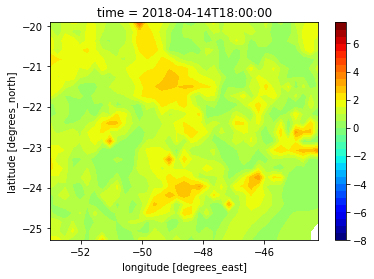

In [12]:
#RMSE para o tempo 4
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-14T18:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

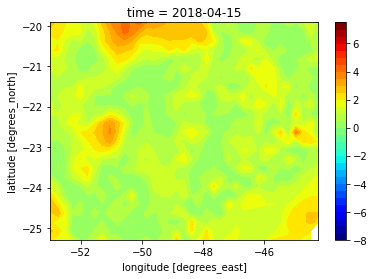

In [13]:
#RMSE para o tempo 5
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-15T00:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

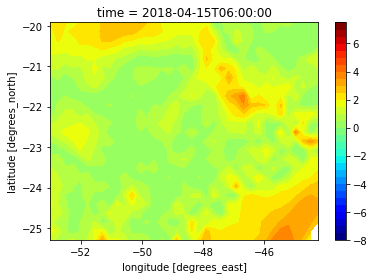

In [14]:
#RMSE para o tempo 6
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-15T06:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

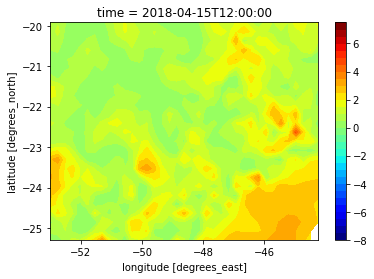

In [15]:
#RMSE para o tempo 7
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-15T12:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

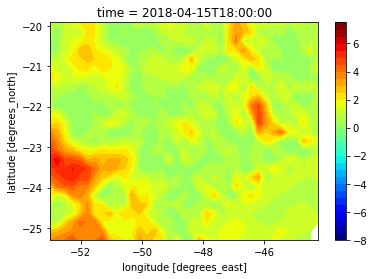

In [16]:
#RMSE para o tempo 8
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-15T18:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

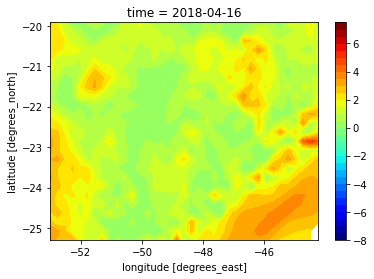

In [17]:
#RMSE para o tempo 9
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-16T00:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

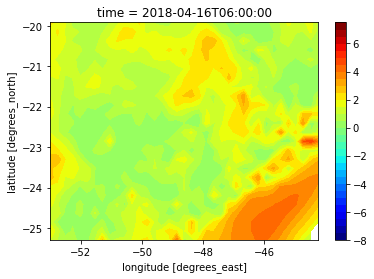

In [18]:
#RMSE para o tempo 10
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-16T06:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

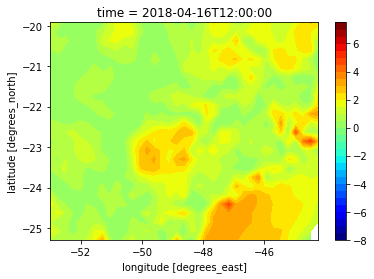

In [19]:
#RMSE para o tempo 11
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-16T12:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

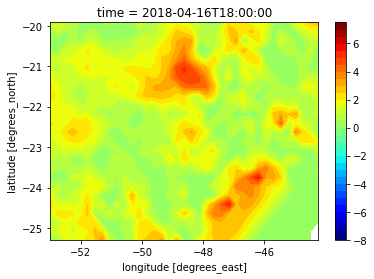

In [20]:
#RMSE para o tempo 12
clevs=np.arange(-8,8,0.5)
rmse_ds.sel(time='2018-04-16T18:00:00.000000000').plot.contourf(levels=clevs,cmap='jet')

### Parte 3 do projeto - Plot da série temporal 

Text(0.5, 1.01, 'RMSE da temperatura')

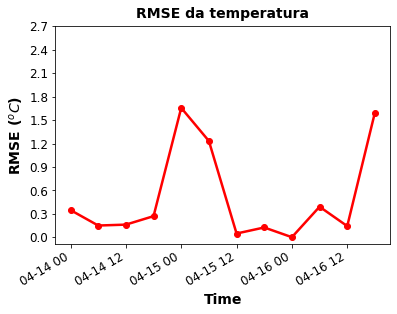

In [21]:
rmse_ds.sel(lat=-23.5489, lon=-46.6388, method='nearest').plot.line(color="red", marker="o",linewidth=2.5)

plt.xlabel('Time', fontsize=14, weight='bold')
plt.ylabel('RMSE ($^oC$)',fontsize=14, weight='bold')

plt.xticks(fontsize=12);
plt.yticks(np.arange(0,3,0.3),fontsize=12);

plt.title("RMSE da temperatura", fontsize=14, y=1.01, weight='bold')
